## Lab Assignment 10

Please fill this notebook with your code and explainations, run everything, save the notebook and upload to canvas.

This lab assignment contains ***`TWO`*** problems. Read each problem carefully and answer them the best you can.

Be sure to provide an explaination to your work using a comment.

#### Exponential Growth/Decay

In calculus you may have learned how to solve a simple differential equation called exponential growth or exponential decay.

$$ \frac{dP}{dt} = P{}'(t) = \lambda P $$

P(t) : Population of some specie as a function of time t.

P(0): Initial population at time 0.

$\lambda$ : Constant growth/decay rate of such an animal. ($\lambda > 0$:  Growth, $\lambda < 0$: Decay)


Solution to such an equation is:

$$ P(t) = P(0) * e^{\lambda t} $$

### Problem 1
From the canvas website, download the EP_1.csv OR EP_2.csv.

The csv files contain data generated by following some kind of exponential growth/decay model.

First plot your chosen data set. Then, identify $\lambda$ the growth/decay rate of your data using linear regression.

Create another plot showing your data and your exponential growth curve using your $\lambda$ to see if they agree.

Hint: $\ln{e^{t}} = t$

In [1]:
import numpy as np
import csv

with open('EJP1.csv', 'r') as f:
    reader = csv.reader(f)
    data_list = list(reader)
    
# with open('EJP2.csv', 'r') as f:
#     reader = csv.reader(f)
#     data_list = list(reader) 
    
print(data_list[0])
print(data_list[1])
print(data_list[2])

# There are more data points.
# You will have to convert strings into floating point numbers.

['Time', 'Population']
['0', '1']
['0.1', '1.3142']


In [2]:
# For Problem 1.

N = len(data_list) - 1    # remove 1 because first line was just labels
Time = np.zeros(N)
Population = np.zeros(N)
LogPopulation = np.zeros(N)

import math
import matplotlib.pyplot as plt
%matplotlib inline

# Need to convert all the strings into a list of floats.
for i in range(1,N+1):
    Time[i - 1] = float(data_list[i][0])         # Time was at index 0
    Population[i - 1] = float(data_list[i][1])   # weight was at index 1
    LogPopulation[i - 1] = math.log(float(data_list[i][1]))   # weight was at index 1    

In [3]:
# For visualization, we need numpy arrays. Create an array using the list.
TimeArray = np.array([Time])
PopulationArray = np.array([Population])
LogPopulationArray = np.array([LogPopulation])

###### Scatter plot of your data set.

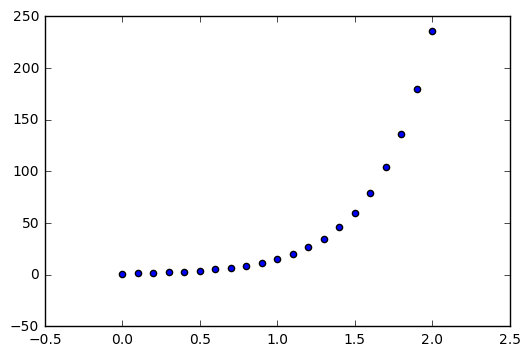

In [4]:
plt.scatter(TimeArray,PopulationArray)

###### Scatter plot of log function applied to your data set.
* Since our original data is an exponential function $e^{\lambda t}$, we should expect a straight line with slope $\lambda$.
* $\log{e^{\lambda t}} = \lambda t $

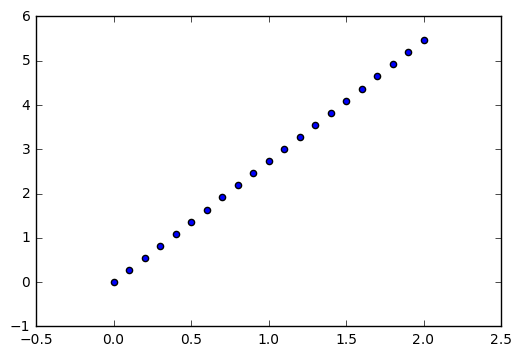

In [5]:
plt.scatter(TimeArray,LogPopulationArray)

###### Apply linear regression to the log of your data to determine lambda.

In [10]:
X = TimeArray
Y = LogPopulationArray

# y = a*x + b.
# y is our log population data, a is the slope to the data (which corresponds to lambda).
# The value of b is really identifying something relative to the initial population.
# P(0) = e^{b}.

# This portion of code taken directly from Lecture 23.
S1 = np.sum(X)
S2 = np.sum(X * X)  
SM = np.sum(X * Y)
SY = np.sum(Y)
a = (1 / (N*S2 - S1*S1)) * (N * SM - S1 * SY)
b = (1 / (N*S2 - S1*S1)) * (- S1 * SM + S2 * SY)

print("This is the approximation of lambda: ",a)

# For EJP1.csv: Expect value close to e.
# For EJP2.csv: Expect value close to -pi.

This is the approximation of lambda:  2.73196602138


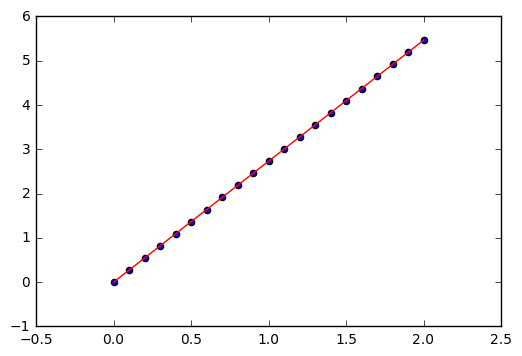

In [7]:
# We see good agreement with the best of fit line.
plt.scatter(TimeArray,LogPopulationArray)
plt.plot(Time,a*Time+b,"r")

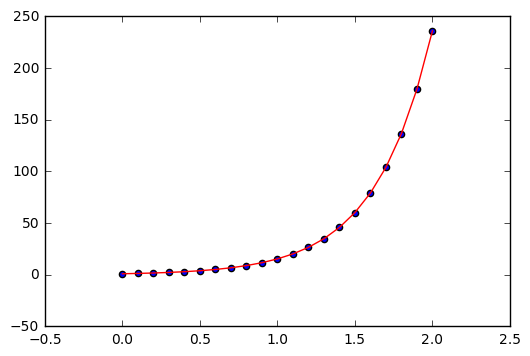

In [8]:
# We see good agreement with the data you chose.
plt.scatter(TimeArray,PopulationArray)
plt.plot(Time,Population[0]*(math.e)**(a*Time),"r")

### Problem 2

This is a conceptual/brain storm problem: Write your answer using Markdown format.

Here is a different model called Logistic growth, population capacity L:  $$ \frac{dP}{dt} = P{}'(t) = \lambda P\left(1-\frac{P}{L}\right)$$

How/When can we identify $\lambda$ from this model? Can we apply a similar technique to the logistic model if you were provided the data?

Explain your reasoning!

In [9]:
# For Problem 2.

When your population P is small relative to L, $\left(1-\frac{P}{L}\right)$ is very close to the number 1.
So for small population, the logistic growth model could be approximated by the exponential growth model. For the first few time steps, apply the analysis from problem 1 for small population size.

### Problem 3 (Optional, Not Graded)
Try to generate a data set that follow logistic growth data and test your idea from problem 2.